<a href="https://colab.research.google.com/github/rixprakash/Jarheads/blob/main/Project%202/SCRIPTS/EDAcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/rixprakash/Jarheads

Cloning into 'Jarheads'...
remote: Enumerating objects: 731, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 731 (delta 130), reused 61 (delta 61), pack-reused 545 (from 1)
Receiving objects: 100% (731/731), 110.93 MiB | 9.46 MiB/s, done.
Resolving deltas: 100% (362/362), done.
Updating files: 100% (50/50), done.


In [2]:
import pandas as pd

vix_file = '/content/Jarheads/Project 2/DATA/CBOE Volatility Index Historical Data.csv'
spy_file = '/content/Jarheads/Project 2/DATA/SPY ETF Stock Price History.csv'
vix_df = pd.read_csv(vix_file)
spy_df = pd.read_csv(spy_file)

In [3]:
import os
if not os.path.exists(vix_file) or not os.path.exists(spy_file):
  print("Error: One or both input files not found.")
else:
  try:
    # Convert the 'Date' column to datetime objects
    vix_df['Date'] = pd.to_datetime(vix_df['Date'])
    spy_df['Date'] = pd.to_datetime(spy_df['Date'])

    # Merge the DataFrames based on the 'Date' column
    marketdata = pd.merge(vix_df, spy_df, on='Date', how='inner')

    # Save the merged DataFrame to a new CSV file
    marketdata.to_csv(output_file, index=False)
    print(f"Merged data saved to {output_file}")

  except Exception as e:
    print(f"An error occurred: {e}")
marketdata.head()

An error occurred: name 'output_file' is not defined


,Date,Price_x,Open_x,High_x,Low_x,Vol._x,Change %_x,Price_y,Open_y,High_y,Low_y,Vol._y,Change %_y
0,2025-03-03,22.78,19.83,24.31,19.25,NaN,16.05%,583.77,596.18,597.34,579.90,74.25M,-1.75%
1,2025-02-28,19.63,21.21,22.40,19.05,NaN,-7.10%,594.18,585.56,594.72,582.44,88.74M,1.56%
2,2025-02-27,21.13,18.25,21.47,17.67,NaN,10.63%,585.05,596.85,598.02,584.65,74.20M,-1.60%
3,2025-02-26,19.10,18.96,20.06,17.83,NaN,-1.70%,594.54,595.93,599.58,591.86,43.32M,0.05%
4,2025-02-25,19.43,19.09,21.48,18.85,NaN,2.37%,594.24,597.15,597.89,589.56,58.27M,-0.50%


In [4]:
marketdata = marketdata.rename(columns=lambda x: x.replace('_x', '_VIX'))
marketdata = marketdata.rename(columns=lambda x: x.replace('_y', '_SPY'))
marketdata.head()

,Date,Price_VIX,Open_VIX,High_VIX,Low_VIX,Vol._VIX,Change %_VIX,Price_SPY,Open_SPY,High_SPY,Low_SPY,Vol._SPY,Change %_SPY
0,2025-03-03,22.78,19.83,24.31,19.25,NaN,16.05%,583.77,596.18,597.34,579.90,74.25M,-1.75%
1,2025-02-28,19.63,21.21,22.40,19.05,NaN,-7.10%,594.18,585.56,594.72,582.44,88.74M,1.56%
2,2025-02-27,21.13,18.25,21.47,17.67,NaN,10.63%,585.05,596.85,598.02,584.65,74.20M,-1.60%
3,2025-02-26,19.10,18.96,20.06,17.83,NaN,-1.70%,594.54,595.93,599.58,591.86,43.32M,0.05%
4,2025-02-25,19.43,19.09,21.48,18.85,NaN,2.37%,594.24,597.15,597.89,589.56,58.27M,-0.50%


                                Date    Price_VIX     Open_VIX     High_VIX  \
count                           2555  2555.000000  2555.000000  2555.000000   
mean   2020-01-30 14:29:04.344422656    18.249699    18.402274    19.499585   
min              2015-01-05 00:00:00     9.140000     9.010000     9.310000   
25%              2017-07-18 12:00:00    13.370000    13.510000    14.115000   
50%              2020-01-31 00:00:00    16.330000    16.490000    17.430000   
75%              2022-08-13 12:00:00    21.275000    21.600000    22.860000   
max              2025-03-03 00:00:00    82.690000    82.690000    85.470000   
std                              NaN     7.232153     7.264265     8.072109   

           Low_VIX  Vol._VIX    Price_SPY     Open_SPY     High_SPY  \
count  2555.000000       0.0  2555.000000  2555.000000  2555.000000   
mean     17.392348       NaN   339.215554   339.173452   340.996270   
min       8.560000       NaN   182.860000   182.340000   184.100000   
25% 

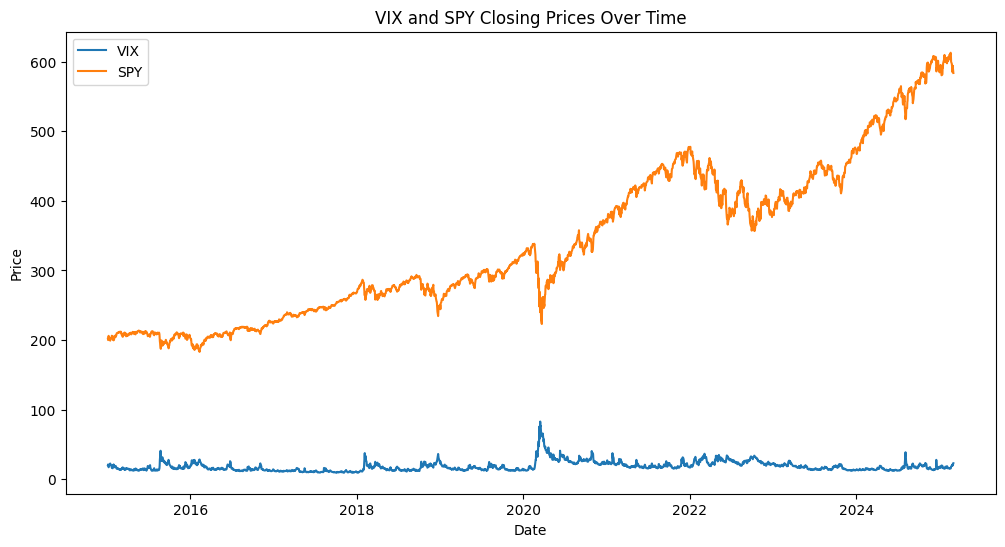

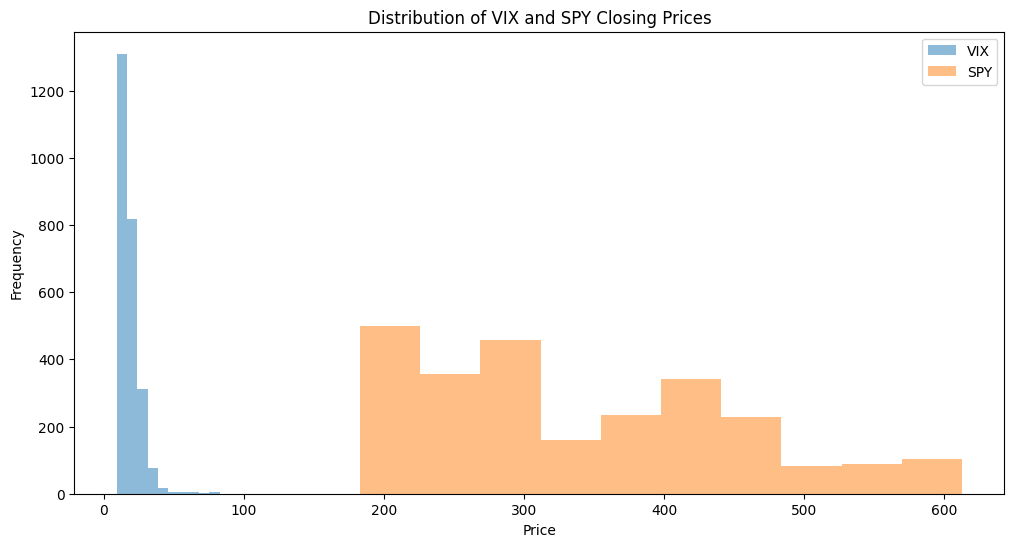

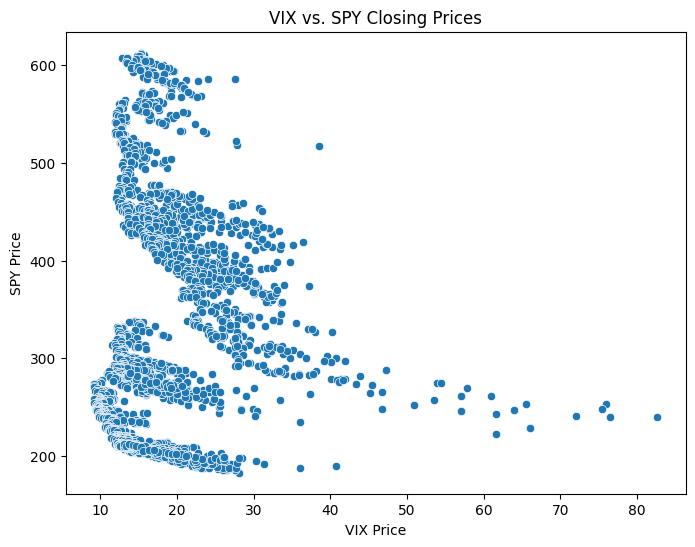

           Price_VIX  Price_SPY
Price_VIX   1.000000   0.072998
Price_SPY   0.072998   1.000000


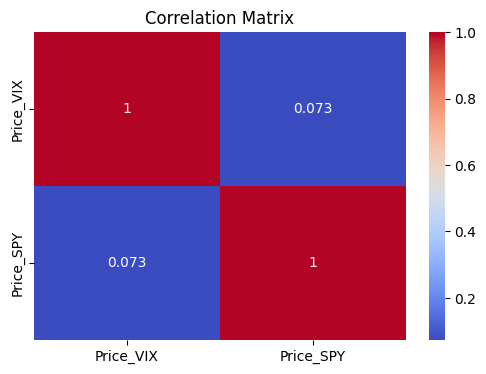

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns



print(marketdata.describe())
print(marketdata.isnull().sum())
print(marketdata.dtypes)

# Plot VIX and SPY closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(marketdata['Date'], marketdata['Price_VIX'], label='VIX')
plt.plot(marketdata['Date'], marketdata['Price_SPY'], label='SPY')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('VIX and SPY Closing Prices Over Time')
plt.legend()
plt.show()

# Histogram of VIX and SPY closing prices
plt.figure(figsize=(12, 6))
plt.hist(marketdata['Price_VIX'], alpha=0.5, label='VIX')
plt.hist(marketdata['Price_SPY'], alpha=0.5, label='SPY')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of VIX and SPY Closing Prices')
plt.legend()
plt.show()

# Scatter plot of VIX vs. SPY closing prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price_VIX', y='Price_SPY', data=marketdata)
plt.xlabel('VIX Price')
plt.ylabel('SPY Price')
plt.title('VIX vs. SPY Closing Prices')
plt.show()

# Correlation matrix
correlation_matrix = marketdata[['Price_VIX', 'Price_SPY']].corr()
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Monthly Statistics:
       Price_VIX              Price_SPY            
            mean        std        mean         std
Month                                              
1      17.831176   5.314151  345.561538  122.911500
2      18.833081   5.547189  349.412370  125.490624
3      21.905566  13.721267  320.847014  102.669791
4      18.961893   8.679292  325.736505  103.433142
5      17.943113   6.703618  326.775519  101.359165
6      17.567406   6.811064  329.234717  103.323829
7      16.227619   5.394808  339.718571  108.673827
8      17.216278   5.179073  343.457040  108.803365
9      18.668725   6.163941  340.839559  110.297236
10     19.213409   6.389260  341.264864  112.195761
11     17.095971   4.960345  351.209466  116.658470
12     17.386746   5.365456  357.067177  120.910607


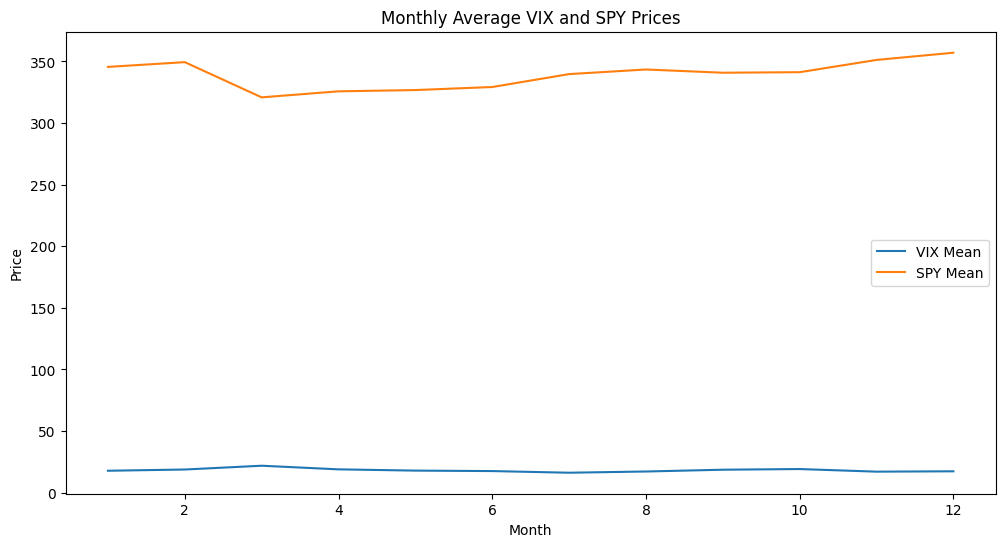


Yearly Statistics:
      Price_VIX              Price_SPY           
           mean        std        mean        std
Year                                             
2015  16.669681   4.343156  206.190120   5.517184
2016  15.825635   3.971853  209.440794  10.142770
2017  11.090239   1.356134  244.696375  10.942452
2018  16.639841   5.089683  274.339641  10.079264
2019  15.387857   2.610363  290.995317  15.106035
2020  29.251304  12.335900  321.216482  31.916964
2021  19.656151   3.621220  426.319484  28.707397
2022  25.623904   4.215348  408.893466  29.060546
2023  16.870040   3.139177  427.367200  23.025972
2024  15.607579   3.363021  541.413849  36.791905
2025  17.042250   1.882220  598.586250   9.104861


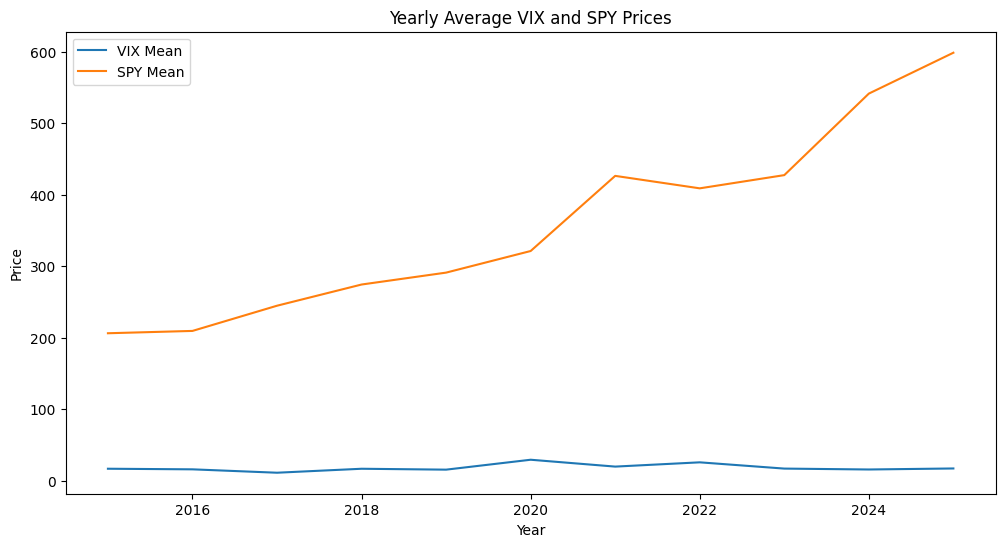

In [6]:
marketdata['Date'] = pd.to_datetime(marketdata['Date'])

# EDA by Month
marketdata['Month'] = marketdata['Date'].dt.month
marketdata['Year'] = marketdata['Date'].dt.year

monthly_data = marketdata.groupby('Month').agg({'Price_VIX': ['mean', 'std'], 'Price_SPY': ['mean', 'std']})
print("Monthly Statistics:")
print(monthly_data)

# Plotting monthly trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data[('Price_VIX', 'mean')], label='VIX Mean')
plt.plot(monthly_data.index, monthly_data[('Price_SPY', 'mean')], label='SPY Mean')

plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Monthly Average VIX and SPY Prices')
plt.legend()
plt.show()


# EDA by Year
yearly_data = marketdata.groupby('Year').agg({'Price_VIX': ['mean', 'std'], 'Price_SPY': ['mean', 'std']})
print("\nYearly Statistics:")
print(yearly_data)

# Plotting yearly trends
plt.figure(figsize=(12, 6))
plt.plot(yearly_data.index, yearly_data[('Price_VIX', 'mean')], label='VIX Mean')
plt.plot(yearly_data.index, yearly_data[('Price_SPY', 'mean')], label='SPY Mean')

plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Yearly Average VIX and SPY Prices')
plt.legend()
plt.show()
